# 1. Lectura de datos

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer data set
ruta = 'C:/Users/pc/Documents/AI/LSTM/data/indicators_results.csv'

df = pd.read_csv(ruta, sep=',')
df

,date,time,open,close,high,low,up,down,tema_high,tema_low,tema_up,tema_down,macd_line,macd_signal,macd_histogram
0,10/30/2022,9:50:00 PM,4371.25,4374.75,4375.75,4370.75,18.59,10.58,4373.471630,4368.308889,16.383236,13.600468,0.259259,0.051852,0.207407
1,10/30/2022,10:00:00 PM,4374.75,4376.00,4378.00,4373.75,13.48,9.08,4375.168311,4370.332444,15.482362,11.868725,0.559143,0.153310,0.405833
2,10/30/2022,10:10:00 PM,4375.75,4373.50,4377.75,4373.00,7.85,11.63,4376.335240,4371.567881,12.834033,11.482188,0.588293,0.240307,0.347986
3,10/30/2022,10:20:00 PM,4373.50,4373.75,4374.25,4372.25,5.17,6.31,4375.957452,4372.197200,9.921133,9.367452,0.624370,0.317119,0.307250
4,10/30/2022,10:30:00 PM,4373.50,4374.50,4375.50,4372.50,5.97,4.54,4376.076271,4372.714094,8.050711,7.203806,0.705349,0.394765,0.310584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75486,12/06/2024,11:20:00 AM,6172.25,6168.00,6173.00,6165.75,120.88,148.28,6173.744701,6168.275756,83.008322,87.010704,0.326128,0.404731,-0.078603
75487,12/06/2024,10:40:00 AM,6179.25,6178.50,6180.25,6176.00,64.64,69.48,6176.115472,6170.923548,79.604807,84.041170,0.917785,0.507341,0.410443
75488,12/06/2024,10:50:00 AM,6178.75,6176.75,6178.75,6175.00,57.71,62.16,6177.348499,6172.552893,74.332217,78.944217,1.231273,0.652128,0.579145
75489,12/06/2024,11:10:00 AM,6177.50,6172.50,6177.75,6170.25,91.41,114.90,6177.885934,6172.088412,81.904364,93.277749,1.123821,0.746466,0.377355


# 2. Eliminar columnas y poner datetime como indice

In [21]:
# Combinar Date y Time en una sola columna DateTime
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

# Reorganizar columnas (DateTime primero, eliminar Date y Time originales)
columns = ['datetime', 'open', 'close', 'high', 'low', 'up', 'down', 'tema_high', 'tema_low', 'tema_up', 'tema_down', 
           'macd_line', 'macd_signal', 'macd_histogram']
df = df[columns]

df = df.set_index('datetime')

df.sort_index(inplace=True)

df

C:\Users\pc\AppData\Local\Temp\ipykernel_12716\800562494.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])


,open,close,high,low,up,down,tema_high,tema_low,tema_up,tema_down,macd_line,macd_signal,macd_histogram
datetime,,,,,,,,,,,,,
2022-10-30 19:50:00,4381.25,4377.50,4381.75,4377.00,4.66,9.51,5428.039463,5424.443044,0.785111,3.071348,-128.246801,-25.066078,-103.180722
2022-10-30 21:50:00,4371.25,4374.75,4375.75,4370.75,18.59,10.58,4373.471630,4368.308889,16.383236,13.600468,0.259259,0.051852,0.207407
2022-10-30 22:00:00,4374.75,4376.00,4378.00,4373.75,13.48,9.08,4375.168311,4370.332444,15.482362,11.868725,0.559143,0.153310,0.405833
2022-10-30 22:10:00,4375.75,4373.50,4377.75,4373.00,7.85,11.63,4376.335240,4371.567881,12.834033,11.482188,0.588293,0.240307,0.347986
2022-10-30 22:20:00,4373.50,4373.75,4374.25,4372.25,5.17,6.31,4375.957452,4372.197200,9.921133,9.367452,0.624370,0.317119,0.307250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-16 16:50:00,6148.50,6149.50,6149.50,6147.50,4.02,3.78,6152.145744,6149.408915,31.477169,34.390737,-0.326436,0.154473,-0.480909
2024-12-16 17:00:00,6149.25,6149.50,6149.75,6148.00,3.55,4.24,6151.674011,6149.660749,16.387008,18.340250,-0.355168,-0.011202,-0.343966
2024-12-16 18:10:00,6149.25,6144.50,6150.00,6144.00,10.97,12.44,6152.455837,6146.662142,43.562807,33.122089,0.775892,0.885989,-0.110097


# Analisis explotario

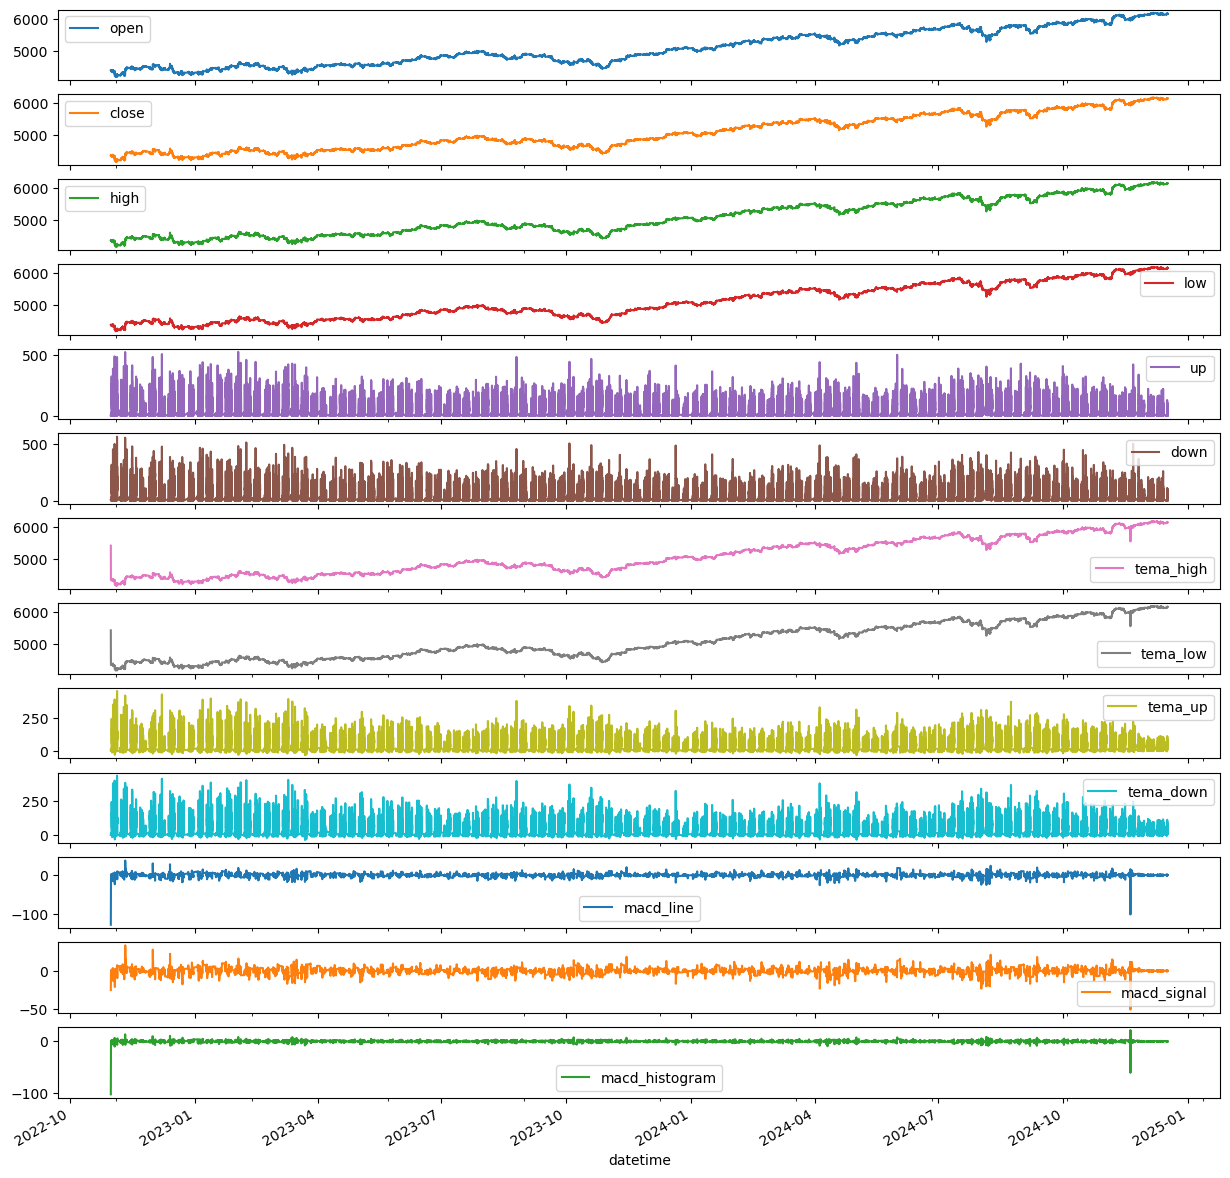

In [22]:
cols = df.columns

N = df.shape[0]
plots = df[cols][0:N]
plots.index = df.index[0:N]
_ = plots.plot(subplots=True, figsize=(15, 16))


# Datos faltantes

In [23]:
print('Cantidad de NaNs:')
for colum in df:
    nans = df[colum].isna().sum()
    print(f'\tColumna {colum}: {nans}')

Cantidad de NaNs:
	Columna open: 0
	Columna close: 0
	Columna high: 0
	Columna low: 0
	Columna up: 0
	Columna down: 0
	Columna tema_high: 0
	Columna tema_low: 0
	Columna tema_up: 0
	Columna tema_down: 0
	Columna macd_line: 0
	Columna macd_signal: 0
	Columna macd_histogram: 0


# Periodicidad de las muestras

In [24]:
df_time_diffs = df.index.to_series().diff().dt.total_seconds()
print(df_time_diffs.value_counts())

datetime
600.0       74936
4200.0        423
177000.0      102
18600.0        15
263400.0        5
190200.0        3
7200.0          2
17400.0         2
204600.0        1
1800.0          1
Name: count, dtype: int64


Garantizar misma periodicidad entre muestras

In [28]:
df2 = df.asfreq(freq='10T', method='bfill')

df_time_diffs = df2.index.to_series().diff().dt.total_seconds()
print(df_time_diffs.value_counts())

datetime
600.0    112024
Name: count, dtype: int64


C:\Users\pc\AppData\Local\Temp\ipykernel_12716\1159721651.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df2 = df.asfreq(freq='10T', method='bfill')


# Verificar que no se haya cambiado el promedio de los datos

In [29]:
for colum in df:
    print(f'Promedios original/modificados: {df[colum].mean():.2f} / {df2[colum].mean():.2f}')

Promedios original/modificados: 5068.68 / 5068.97
Promedios original/modificados: 5068.70 / 5069.18
Promedios original/modificados: 5070.70 / 5071.76
Promedios original/modificados: 5066.58 / 5066.41
Promedios original/modificados: 33.56 / 29.38
Promedios original/modificados: 33.71 / 29.18
Promedios original/modificados: 5070.70 / 5070.91
Promedios original/modificados: 5066.58 / 5066.85
Promedios original/modificados: 33.56 / 25.35
Promedios original/modificados: 33.71 / 25.44
Promedios original/modificados: 0.17 / 0.31
Promedios original/modificados: 0.17 / 0.31
Promedios original/modificados: 0.00 / 0.00


In [30]:
df2.to_csv('C:/Users/pc/Documents/AI/LSTM/data/indicators_results_10T.csv', sep=';', decimal='.')